In [5]:
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import lognorm
from scipy.stats import halfnorm
from scipy.stats import crystalball
from scipy.stats import laplace_asymmetric
from scipy.stats import halfcauchy

In [6]:
def laplace_asymmetricfit(args, x):
#     df = args
    Amp, kappa, loc, scale, b = args
#     print(df)
    rv = laplace_asymmetric(kappa = kappa, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b

In [7]:
def lstsq_laplace_asymmetricfit(args, x, y):
#     print(args, x, y)
    return laplace_asymmetricfit(args, x) - y

In [8]:
def skewnormfit(args, x):
#     df = args
    Amp, a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [9]:
def lstsq_skewnormfit(args, x, y):
#     print(args, x, y)
    return skewnormfit(args, x) - y

In [10]:
def skewnormfit2(args, x):
#     df = args
    a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [11]:
def lstsq_skewnormfit2(args, x, y):
#     print(args, x, y)
    return skewnormfit2(args, x) - y

In [12]:
def lognormfit(args, x):
#     df = args
    Amp, s, loc, scale, b, c = args
#     print(df)
    rv = lognorm(s = s, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x

In [13]:
def lstsq_lognormfit(args, x, y):
#     print(args, x, y)
    return lognormfit(args, x) - y

In [14]:
def normfit(args, x):
#     df = args
    Amp, loc, scale, a, b, c = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x +c*x*x

In [15]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [16]:
def normfit2(args, x):
#     df = args
    Amp, loc, scale, a, b, c, d = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x + d*x*x*x

In [17]:
def lstsq_normfit2(args, x, y):
#     print(args, x, y)
    return normfit2(args, x) - y

In [18]:
def halfnormfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [19]:
def lstsq_halfnormfit(args, x, y):
#     print(args, x, y)
    return halfnormfit(args, x) - y

In [20]:
def halfnormfit2(args, x):
#     df = args
    Amp, scale, a, b = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x

In [21]:
def lstsq_halfnormfit2(args, x, y):
#     print(args, x, y)
    return halfnormfit2(args, x) - y

In [22]:
def halfcauchyfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfcauchy(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [23]:
def lstsq_halfcauchyfit(args, x, y):
#     print(args, x, y)
    return halfcauchyfit(args, x) - y

In [24]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    if hist is None:
        hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    if unchist is None:
        unchist = np.sqrt(dist)/np.sum(dist)/np.diff(bincenters)[0]
    chi2fit = np.sum((hist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

In [25]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [26]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [27]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [28]:
def extendedBins(bins, left, right):
    binwidth = np.diff(bins)[0]
    leftbins = bins[0] - (np.linspace(1, left+1, left+1)*binwidth)[::-1]
    rightbins = np.linspace(1, right+1, right +1)*binwidth + bins[-1]
    return np.array([*leftbins, *bins, *rightbins])

## Inbending DVCS

In [29]:
parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/outb/epg/"
epg_4398 = pd.read_pickle(parent_epg + "4398" + "_epg.pkl")
epg_4243 = pd.read_pickle(parent_epg + "4243" + "_epg.pkl")

In [30]:
dvcsSimOutb = epg_4398
bkgSimOutb = epg_4243

In [31]:
dvcsSimOutb = dvcsSimOutb.loc[dvcsSimOutb.Ge>2]
bkgSimOutb = bkgSimOutb.loc[bkgSimOutb.Ge>2]

## CD cuts

In [49]:
dvcsSimOutbCD = dvcsSimOutb.loc[dvcsSimOutb.config == 2]
bkgSimOutbCD = bkgSimOutb.loc[bkgSimOutb.config == 2]

In [50]:
contInbCDFT = .0040597266707579184
contInbCD = 0.13554782386935704
contInbFD = 0.3804839519140771
contOutbCDFT = 0.005652963491001403
contOutbCD = 0.21805902894791315
contOutbFD = 0.5115950737954632

In [51]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.MM2_ep, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.MM2_ep, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 5838.505360382149 94
0.00043145020254542477 146.5068701767695 94
[ 2.74201629e-01  1.62203903e-02  6.81761434e-02  2.15517423e+00
  2.02277502e+00 -2.42697447e+01] -0.12379628997227095 0.15623707059783065 0.00043145020254542477
0.2927318385913116 100.98116608873833 94
[ 3.74837023e-01  1.46354568e-02  7.04898837e-02  2.40587600e+00
  2.50293186e+00 -2.22225748e+01] -0.1301330649758377 0.15940397862413105 0.2927318385913116
0.013686138090946876 126.78507847448425 94
0.019665777070541957 124.3699379274212 94
0.008608688195462899 129.74538138453988 94
0.014570660776536348 126.37455958317994 94
0.030595805103411866 121.28366205706905 94
0.0057932208877991 132.17604726434234 94
0.20207643313320423 105.19350112540089 94


In [52]:
len(dvcsSimOutbCD)

1938483

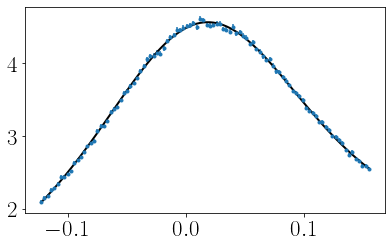

In [53]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [54]:
print(lb_opt, ub_opt)

-0.19683419418900555 0.22610510783729892


In [55]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.MM2_ep<0.226)&(dvcsSimOutbCD.MM2_ep>-0.196)]
bkgSimOutbCD = bkgSimOutbCD.loc[(bkgSimOutbCD.MM2_ep<0.226)&(bkgSimOutbCD.MM2_ep>-0.196)]

In [56]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.908, 0.244, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.MM2_eg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.MM2_eg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 19361.243768350676 94
4.422334165532504e-09 195.29569511476134 94
[ 0.37034449  0.97281257  0.30778413 -0.01590836  0.84752466 -0.35480623] 0.34070124267245316 1.6049238918857784 4.422334165532504e-09
0.34742728222563746 98.79353145628878 94
[ 0.41165264  0.9691293   0.3080854  -0.04138624  0.97091326 -0.39337102] 0.33639923617380707 1.6018593648884116 0.34742728222563746
0.8817071634304863 78.09273051837644 94
[ 0.42666746  0.96878355  0.31104788 -0.03211292  0.92107694 -0.36669441] 0.32996930450851103 1.6075977980743112 0.8817071634304863
0.1809460239512206 106.34386622979234 94
0.36583709930515473 98.09497354856988 94
0.3564463806423488 98.44930677014247 94
0.14701227298106245 108.40520185389055 94
0.5260176609707943 92.4458827791457 94
0.2660948717589897 102.1256584150969 94


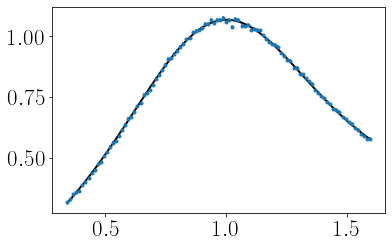

In [57]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [58]:
print(lb_opt, ub_opt)

0.03563990825516539 1.9019271943276572


In [59]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.MM2_eg<1.902)&(dvcsSimOutbCD.MM2_eg>0.0356)]
bkgSimOutbCD = bkgSimOutbCD.loc[(bkgSimOutbCD.MM2_eg<1.902)&(bkgSimOutbCD.MM2_eg>0.0356)]

In [60]:
len(dvcsSimOutbCD)

1097905

In [61]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.ME_epg, bins = np.linspace(-0.422, 0.466, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.ME_epg, bins = np.linspace(-0.422, 0.466, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.1, 0.14, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.ME_epg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.ME_epg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.4417652022038908 95.34882743527947 94
[ 0.65204286  0.06204947  0.23114267  0.44164442  0.51656189 -0.27652909] -0.4126595417847664 0.5367584734153218 0.4417652022038908
3.357241422641266e-07 178.55165588008964 94
0.08885114239535163 112.96851192910584 94
0.12234395991018376 110.1334340470757 94
0.12808262712021867 109.70966255429215 94
0.06532991000340904 115.52260732797735 94
0.09319051198891126 112.5583843242581 94
0.033847333675915414 120.55350557919837 94
0.049752720373286596 117.66987616937703 94
0.15582050278676685 107.8399727724395 94


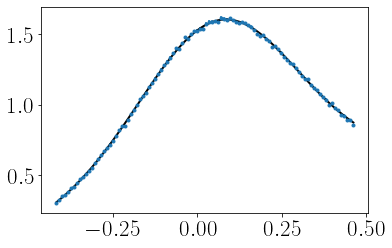

In [62]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [63]:
print(lb_opt, ub_opt)

-0.6313785454804209 0.7554774771109763


In [64]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.ME_epg<0.755)&(dvcsSimOutbCD.ME_epg>-0.631)]
bkgSimOutbCD = bkgSimOutbCD.loc[(bkgSimOutbCD.ME_epg<0.755)&(bkgSimOutbCD.ME_epg>-0.631)]

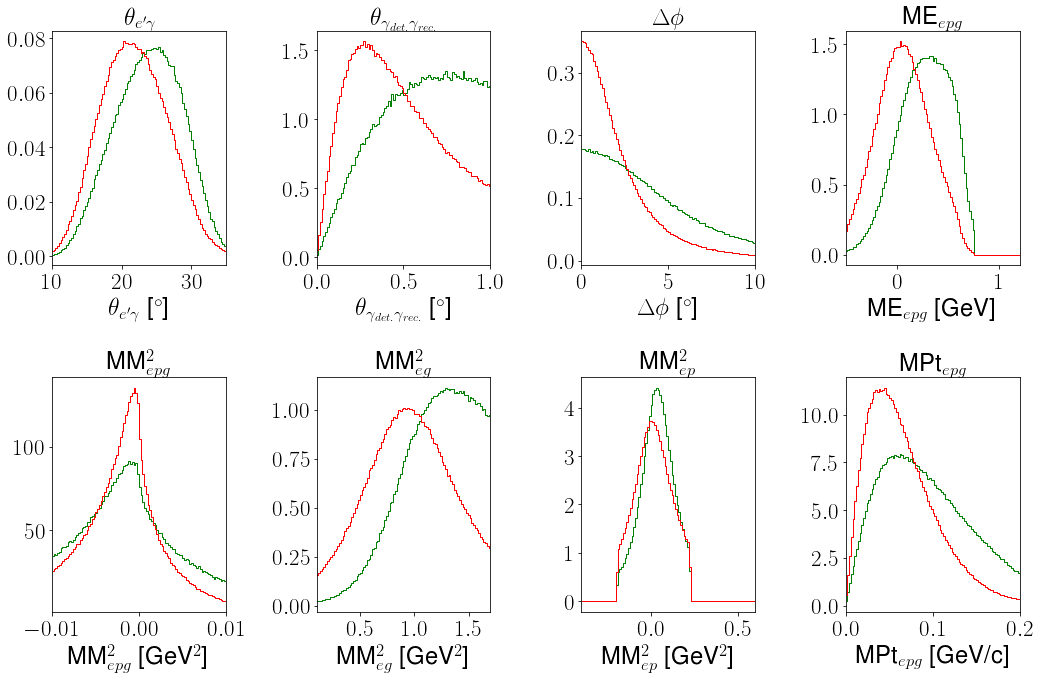

<Figure size 432x288 with 0 Axes>

In [65]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [66]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.coplanarity, bins = np.linspace(0, 10, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.coplanarity, bins = np.linspace(0, 10, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.8, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.coplanarity, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.coplanarity, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp,  scale, a, b, c  = params
#     lb = min(halfnorm.ppf(0.1, loc = loc, scale = scale), -0.01)
#     ub = max(halfnorm.ppf(0.9, loc = loc, scale = scale), 0.003)
    lb = 0#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = 9#max(halfnorm.ppf(0.9, scale = scale), 0.002)
    pvalue, chi2fit, dof = probFit(simDist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

2.220446049250313e-16 253.17384172338328 95
[ 3.25822049e-01  1.72487879e+00  1.68992577e-01 -2.99832522e-02
  1.45028065e-03] 0 9 2.220446049250313e-16
1.687538997430238e-14 239.79143551328903 95
[ 3.29374286e-01  1.72691190e+00  1.71788129e-01 -3.04527275e-02
  1.47274497e-03] 0 9 1.687538997430238e-14
1.687538997430238e-14 239.79143551328903 95
1.687538997430238e-14 239.79143551328903 95
1.687538997430238e-14 239.79143551328903 95
1.687538997430238e-14 239.79143551328903 95
1.687538997430238e-14 239.79143551328903 95
1.687538997430238e-14 239.79143551328903 95
1.687538997430238e-14 239.79143551328903 95
1.687538997430238e-14 239.79143551328903 95


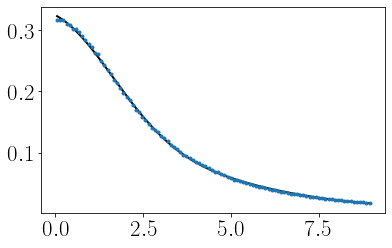

In [67]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [68]:
print(ub_opt)

5.180735712306705


In [69]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.coplanarity<5.181)]
bkgSimOutbCD = bkgSimOutbCD.loc[(bkgSimOutbCD.coplanarity<5.181)]

In [70]:
def lstsq_normfit3(args, x, y):
#     print(args, x, y)
    return normfit3(args, x) - y
def normfit3(args, x):
#     df = args
    loc, scale, a, b = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return rv.pdf(x) + a + b*x

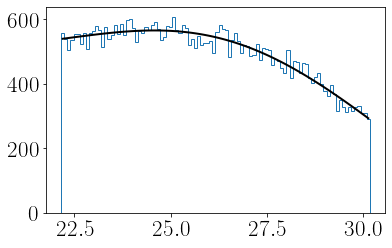

3.0 [ 2.66168153e+01  4.27986156e+00  2.86345737e-01 -9.27022629e-03] 0.15981682743077452
26.61681532198692 13.777230631554662 27.47585253194874


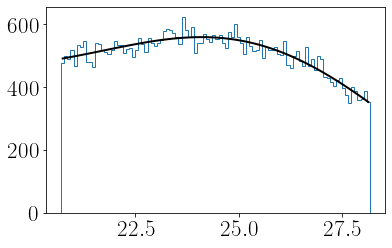

3.5 [ 2.55242524e+01  3.79303709e+00  2.83363362e-01 -9.71312189e-03] 0.19167033822768365
25.52425238146773 14.145141105152248 26.374342466418433


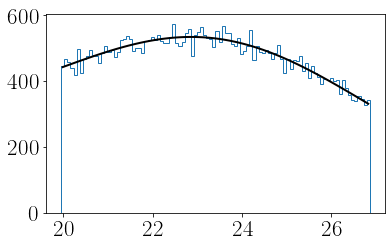

4.0 [ 2.33777375e+01  3.49673987e+00  1.58721072e-01 -4.78401248e-03] 0.8249685596933054
23.377737493959135 12.887517885317786 23.85390070988218


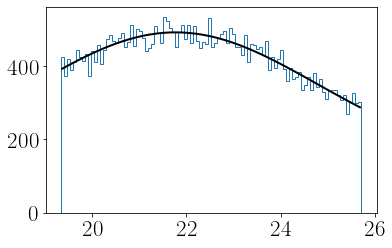

4.5 [2.17533394e+01 3.01595695e+00 4.21150132e-02 2.52924325e-04] 0.019709567395802874
21.75333943721929 12.705468580338266 21.879684476952868


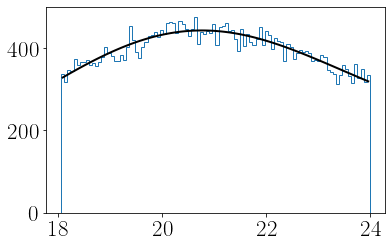

5.0 [ 2.04679151e+01  2.96693819e+00 -3.89159253e-02  4.45580199e-03] 0.8808007191480913
20.467915070651355 11.567100500650827 20.35116729480683


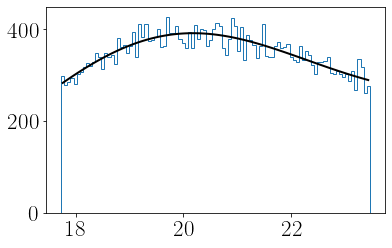

5.5 [ 1.95641232e+01  2.71924161e+00 -1.88363308e-01  1.19100873e-02] 0.24600331476704185
19.564123201210624 11.406398381368872 18.99903327638164


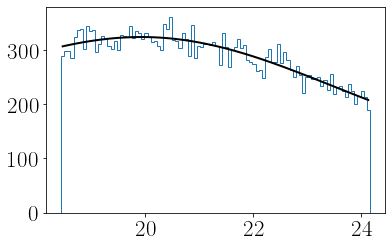

6.0 [ 2.01424977e+01  3.33617770e+00  1.22681062e-01 -2.29840231e-03] 0.5973220103288568
20.142497708145687 10.133964602829849 20.510540892752907


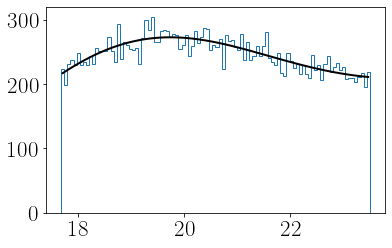

6.5 [ 1.88588163e+01  2.71514411e+00 -2.75887824e-01  1.65337388e-02] 0.8519947644373687
18.858816335692545 10.713384019198852 18.031152863857404


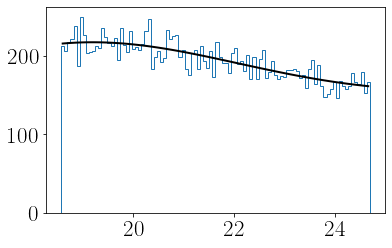

7.0 [ 1.84138094e+01  3.65970135e+00 -4.31793289e-02  6.22562154e-03] 0.5087793128378837
18.413809412511227 7.434705357050348 18.284271425924633


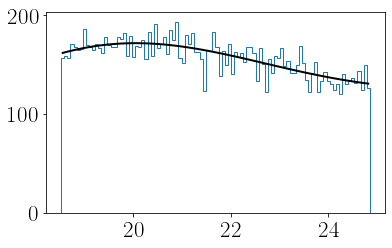

7.5 [ 1.91671591e+01  3.52057961e+00 -9.41654982e-02  7.83702578e-03] 0.7564168855757144
19.16715914994914 8.605420326920541 18.88466265535707


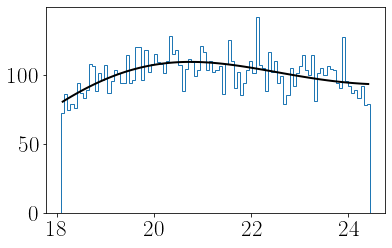

8.0 [ 1.94987451e+01  3.03565889e+00 -2.90371214e-01  1.64197703e-02] 0.17482523699999608
19.498745142223054 10.391768482341607 18.62763149955405


In [71]:
GpEdges = np.linspace(3, 8.5, 12)
GeEdges = GpEdges
GpArray = []
lbs = []
ubs = []
for i in range(len(GpEdges)-1):
    GpMin = GpEdges[i]
    GpMax = GpEdges[i+1]
    var = dvcsSimOutbCD.loc[(dvcsSimOutbCD.Gp>GpMin)&(dvcsSimOutbCD.Gp<GpMax), "coneAngle"]
    hist, bins = np.histogram(var, bins = 100)
    mu = bins[np.argmax(hist)]
    sigma = var.std()
    
    bins = np.linspace(mu-0.5*sigma, mu+1*sigma, 101)
#     if i >3:
#         bins = np.linspace(mu-sigma, mu+0.8*sigma, 101)

    
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist, bins = np.histogram(var, bins = bins)
    dist = hist/np.sum(hist)/np.diff(bins)[0]
    unchist = np.sqrt(hist)
    uncdist = unchist/np.sum(hist)/np.diff(bins)[0]
    params = [mu, sigma, 0, 0]
    res_lsq = least_squares(lstsq_normfit3, params, args=(bincenters, dist))
    plt.hist(var, bins = bins, histtype = 'step')
    
    plt.plot(bincenters, normfit3(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0], 'k-', lw=2, label='frozen pdf')
    plt.show()
    chi2fit = np.sum((hist - normfit3(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    print(GpMin, res_lsq.x ,pvalue)
    print(res_lsq.x[0], res_lsq.x[0]-3*res_lsq.x[1], res_lsq.x[0]+3*res_lsq.x[2])
    GpArray.append((GpMin + GpMax)/2)
    lbs.append(res_lsq.x[0]-2*res_lsq.x[1])
    ubs.append(res_lsq.x[0]+2*res_lsq.x[1])

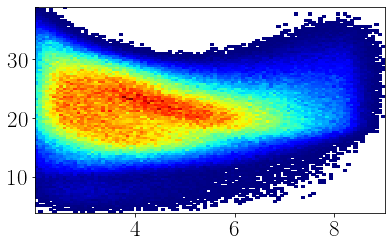

In [72]:
plt.hist2d(dvcsSimOutbCD.Ge, dvcsSimOutbCD.coneAngle, bins = 100, cmin = 1, cmap = cmap)
plt.show()

In [73]:
def lstsq_polyfit(args, x, y):
    x = np.array(x)
    return np.poly1d(args)(x) - y

[  0.79060349 -10.83982487  62.07345506]
[ 0.26564312 -4.28973739 29.79243253]


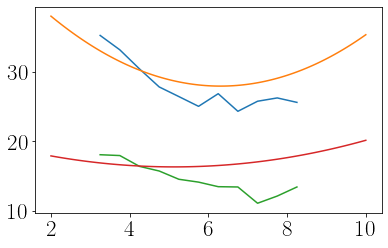

In [74]:
plt.plot(GpArray, ubs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=(GpArray, ubs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([ 0.541, -6.825, 49.430])(np.linspace(2, 10, 101)))
print(res_lsq.x)
plt.plot(GpArray, lbs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=(GpArray, lbs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([ 0.161, -1.652, 20.548])(np.linspace(2, 10, 101)))
print(res_lsq.x)


In [76]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.coneAngle<np.poly1d([ 0.541, -6.825, 49.430])(dvcsSimOutbCD.Gp))&(dvcsSimOutbCD.coneAngle>np.poly1d([ 0.161, -1.652, 20.548])(dvcsSimOutbCD.Gp))]
bkgSimOutbCD = bkgSimOutbCD.loc[(bkgSimOutbCD.coneAngle<np.poly1d([ 0.541, -6.825, 49.430])(bkgSimOutbCD.Gp))&(bkgSimOutbCD.coneAngle>np.poly1d([ 0.161, -1.652, 20.548])(bkgSimOutbCD.Gp))]

In [77]:
len(dvcsSimOutbCD)

766471

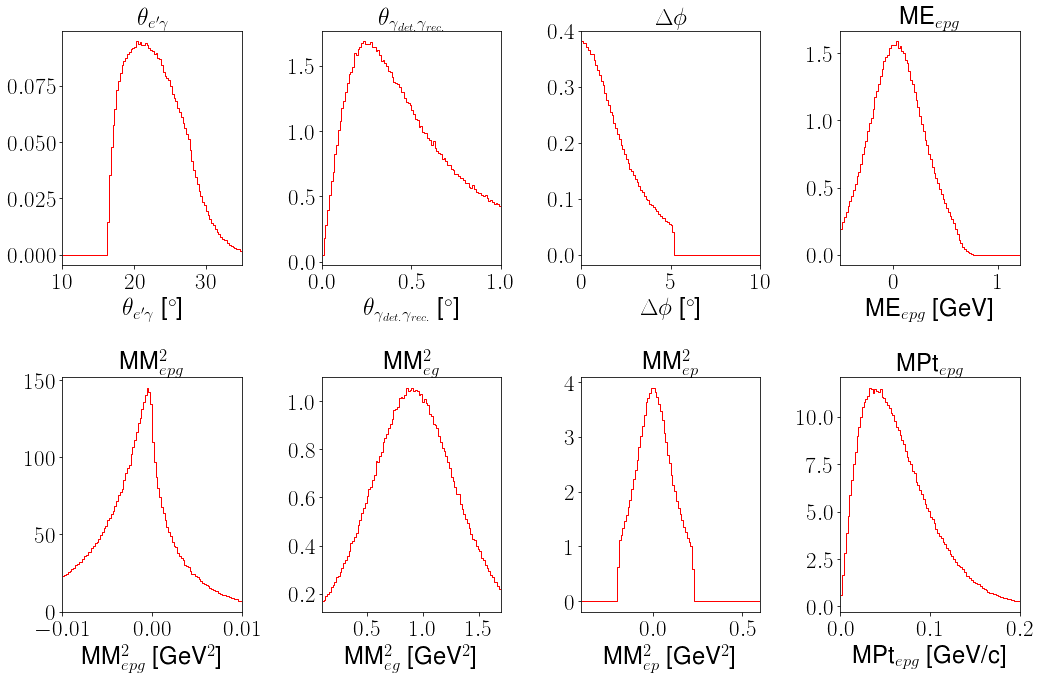

<Figure size 432x288 with 0 Axes>

In [78]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [84]:
pvalue_opt = -0.1
for i in range(0, 1):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.MPt, bins = np.linspace(0.005, 0.1, 21))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.MPt, bins = np.linspace(0.005, 0.1, 21))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.05, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.MPt, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.MPt, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = min(norm.ppf(0.9, loc = loc, scale = scale), 0.04)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+3*scale#norm.ppf(1-0.0013, loc = loc, scale = scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.057643128022850765 23.16462561682439 14
[ 6.90196330e+00 -7.93949096e-03  5.17148263e-02 -5.35727757e+01
  9.86866552e+02 -4.42642130e+03] 0.005 0.04 0.057643128022850765


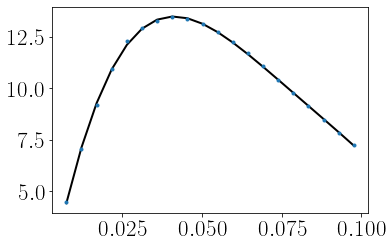

In [85]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [86]:
params_opt

array([ 6.90196330e+00, -7.93949096e-03,  5.17148263e-02, -5.35727757e+01,
        9.86866552e+02, -4.42642130e+03])

In [87]:
print(ub_opt)

0.14720498799502302


In [88]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.MPt<0.147)]
bkgSimOutbCD = bkgSimOutbCD.loc[(bkgSimOutbCD.MPt<0.147)]

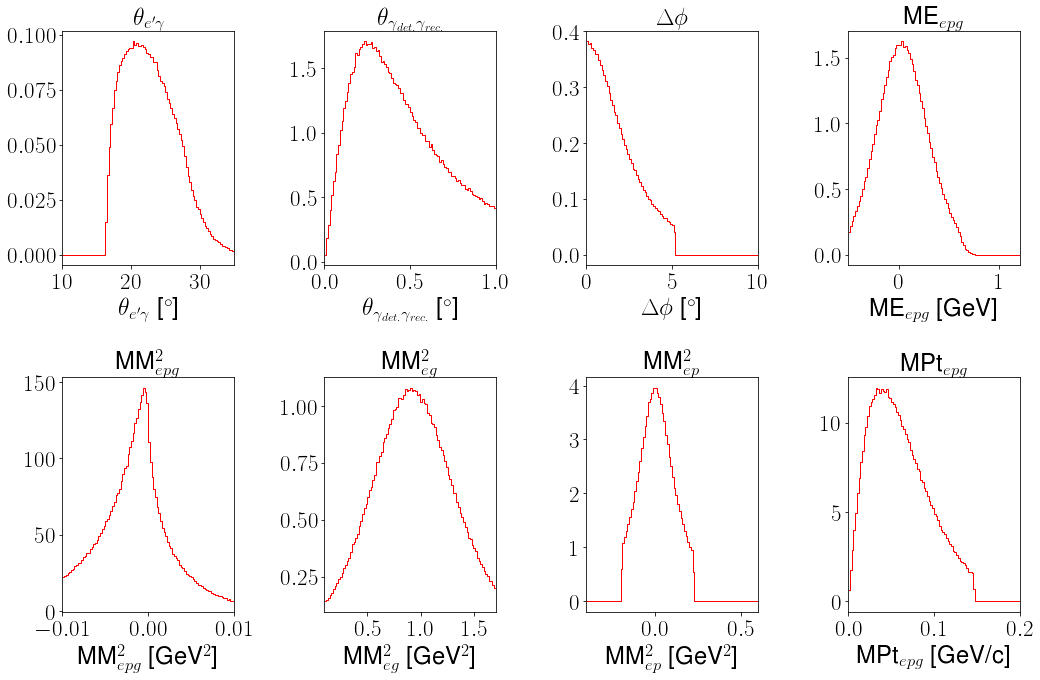

<Figure size 432x288 with 0 Axes>

In [89]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [91]:
pvalue_opt = -0.1
for i in range(0, 1):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.reconGam, bins = np.linspace(0.005, 0.8, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.reconGam, bins = np.linspace(0.005, 0.8, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.reconGam, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.reconGam, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = max(norm.ppf(0.9, loc = loc, scale = scale), 0.6)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+3*scale
#         print(ub_opt, loc + 3*scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

2.1776169756293484e-10 206.25305828234312 94
[ 1.31867573  0.12793253  0.23716049 -1.95430256  8.57040242 -6.48078185] 0.005 0.6 2.1776169756293484e-10


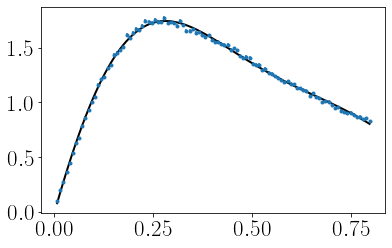

In [92]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [93]:
print(ub_opt)

0.8394140089344653


In [76]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[dvcsSimOutbCD.reconGam<0.839]
bkgSimOutbCD = bkgSimOutbCD.loc[bkgSimOutbCD.reconGam<0.839]

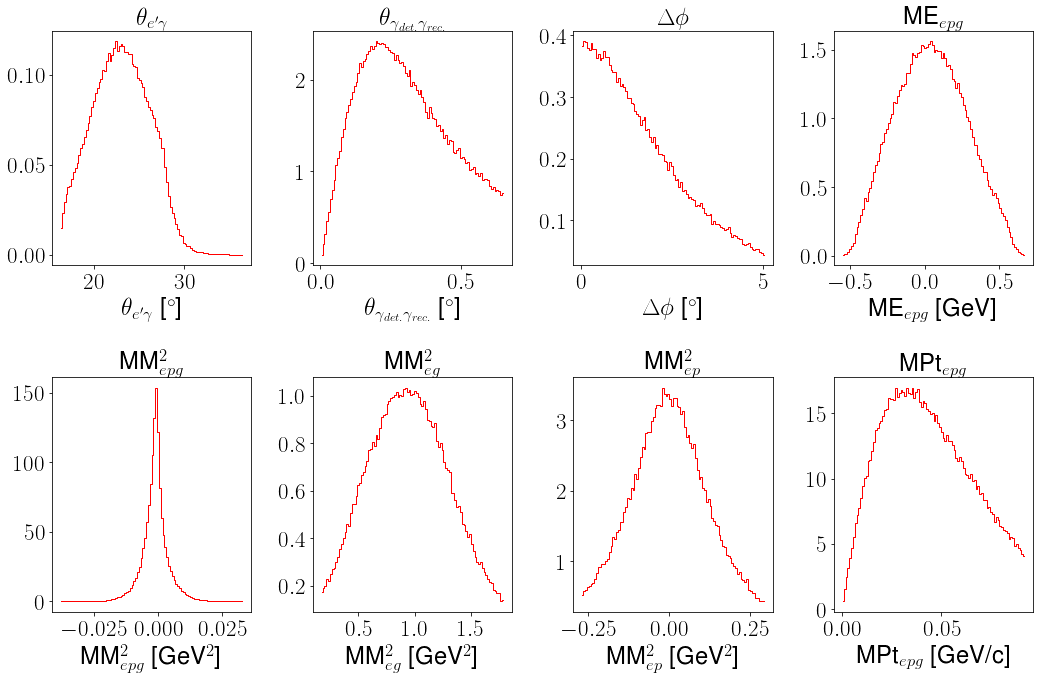

<Figure size 432x288 with 0 Axes>

In [77]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [79]:
print(dvcsSimOutbCD.MM2_epg.mean()+3*dvcsSimOutbCD.MM2_epg.std(), dvcsSimOutbCD.MM2_epg.mean()-3*dvcsSimOutbCD.MM2_epg.std())

0.01393009402855976 -0.016081006123234622
